# OMDENA CHALLENGE
## Predicting Autism in Children
by: **Audrey Emeribe**

## INTRODUCTION
Autism spectrum disorder (ASD) is a developmental disability caused by differences in the brain. People with ASD often have problems with social communication and interaction, and restricted or repetitive behaviors or interests. People with ASD may also have different ways of learning, moving, or paying attention.(Link:https://www.cdc.gov/ncbddd/autism/signs.html#:~:text=Autism%20spectrum%20disorder%20(ASD)%20is,%2C%20moving%2C%20or%20paying%20attention.)

This report aims to explore the dataset given, to analyze trends and patterns in children from the dataset to gain insights on factors that predict autism as well as increase chances of early detection.

## DATASET:

This dataset was gotten from Kaggle . It is the Autism screening data for toddlers dataset(https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers?resource=download)

### Dataset Contents:
**Target Variable:**
- The target variable is **Class** which represents ASD traits or No ASD traits (automatically assigned by the ASDTests app). (Yes / No)

**Q-Chart_10 Screening**
<img src="question1.jpg" width="600" height="400">

**Features**

<img src="feature table1.jpg" width="600" height="400">

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Necessary libraries for plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the file to be used
df = pd.read_csv("merged_saudi_github_thabtah_toddler_child.csv")

# Looking at the first five rows of the dataset
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Class,src
0,0,0,0,0,0,1,1,1,0,0,0,Saudi
1,0,0,1,0,1,0,0,1,0,0,0,Saudi
2,0,0,0,0,0,0,1,0,0,0,0,Saudi
3,0,0,0,0,0,0,0,0,0,0,0,Saudi
4,0,0,0,0,0,0,0,0,0,0,0,Saudi


## EDA AND DATA PREPROCESSING
- Check the contents of the dataset
- Check for null or duplicate values
- Run summary statistics

In [3]:
#  check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A1      2566 non-null   int64 
 1   A2      2566 non-null   int64 
 2   A3      2566 non-null   int64 
 3   A4      2566 non-null   int64 
 4   A5      2566 non-null   int64 
 5   A6      2566 non-null   int64 
 6   A7      2566 non-null   int64 
 7   A8      2566 non-null   int64 
 8   A9      2566 non-null   int64 
 9   A10     2566 non-null   int64 
 10  Class   2566 non-null   int64 
 11  src     2566 non-null   object
dtypes: int64(11), object(1)
memory usage: 240.7+ KB


In [4]:
# Check the shape of the dataframe
df.shape
print(f"The df has {df.shape[0]} rows and {df.shape[1]} columns")

The df has 2566 rows and 12 columns


In [5]:
# Checking for duplicates
# Columns 
print(f'Duplicated columns: {df.T.duplicated().any()}')
# Rows 
print(f'Duplicated rows: {df.duplicated().any()}')

Duplicated columns: False
Duplicated rows: True


- The duplicates could account for the yes or no answers as they are all binary values

In [6]:
# Check for percentage of null values in each column
df.isna().sum()/df.shape[0]*100

A1       0.0
A2       0.0
A3       0.0
A4       0.0
A5       0.0
A6       0.0
A7       0.0
A8       0.0
A9       0.0
A10      0.0
Class    0.0
src      0.0
dtype: float64

**The dataset contains no missing values**

In [7]:
# Summary statistics for the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1,2566.0,0.563133,0.496095,0.0,0.0,1.0,1.0,1.0
A2,2566.0,0.461808,0.498636,0.0,0.0,0.0,1.0,1.0
A3,2566.0,0.460249,0.498515,0.0,0.0,0.0,1.0,1.0
A4,2566.0,0.516758,0.499817,0.0,0.0,1.0,1.0,1.0
A5,2566.0,0.552221,0.497362,0.0,0.0,1.0,1.0,1.0
A6,2566.0,0.577942,0.493984,0.0,0.0,1.0,1.0,1.0
A7,2566.0,0.623149,0.484692,0.0,0.0,1.0,1.0,1.0
A8,2566.0,0.483632,0.499829,0.0,0.0,0.0,1.0,1.0
A9,2566.0,0.491037,0.500017,0.0,0.0,0.0,1.0,1.0
A10,2566.0,0.607171,0.488475,0.0,0.0,1.0,1.0,1.0


**Observation and Next Steps**
- The src column represents where the data was sourced or merged from. Info not needed, so column will be dropped

In [8]:
# the 'src' column will be dropped and proceed with other predictive features
df = df.drop(columns=['src'])

In [9]:
# Check the new shape of the dataframe
df.shape
print(f"The df has {df.shape[0]} rows and {df.shape[1]} columns")

The df has 2566 rows and 11 columns


### Target Variable
**Visualizing the contents of the target**

In [10]:
## Content of the target column
df["Class"].value_counts()

1    1686
0     880
Name: Class, dtype: int64

([<matplotlib.patches.Wedge at 0x2265ee1cd30>,
 [Text(-0.5683466196156249, 1.0568737483595154, '1'),
  Text(0.5209844013143223, -0.9688009359962227, '0')],
 [Text(-0.33153552810911446, 0.6165096865430506, '65.7%'),
  Text(0.28417330980781214, -0.5284368741797578, '34.3%')])

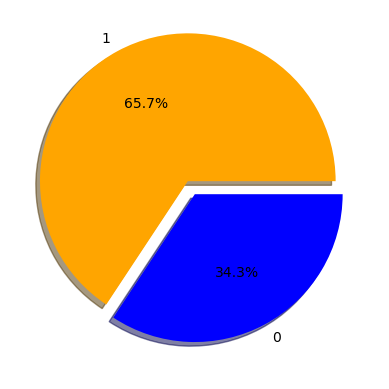

In [11]:
# Visualizing Percentage of Children with ASD Traits
y = df['Class'].value_counts().values
labels = df['Class'].value_counts().index

# Defining colors for the pie chart
colors = ['orange', 'blue']
  
# Define the ratio of gap of each fragment in a tuple
explode = (0.1, 0.0)
  
# Plotting the pie chart for above dataframe
plt.pie(y, labels= labels, autopct='%1.1f%%', colors=colors, explode=explode, shadow = True)

**Observation**
- 69% of the children observed from the dataset have ASD traits
- This shows a class imbalance in the dataset

### Bivariate Analysis - Numerical Variables

**Evaluating the relationship between the numerical features and the target**

In [12]:
numerical_col = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10"]

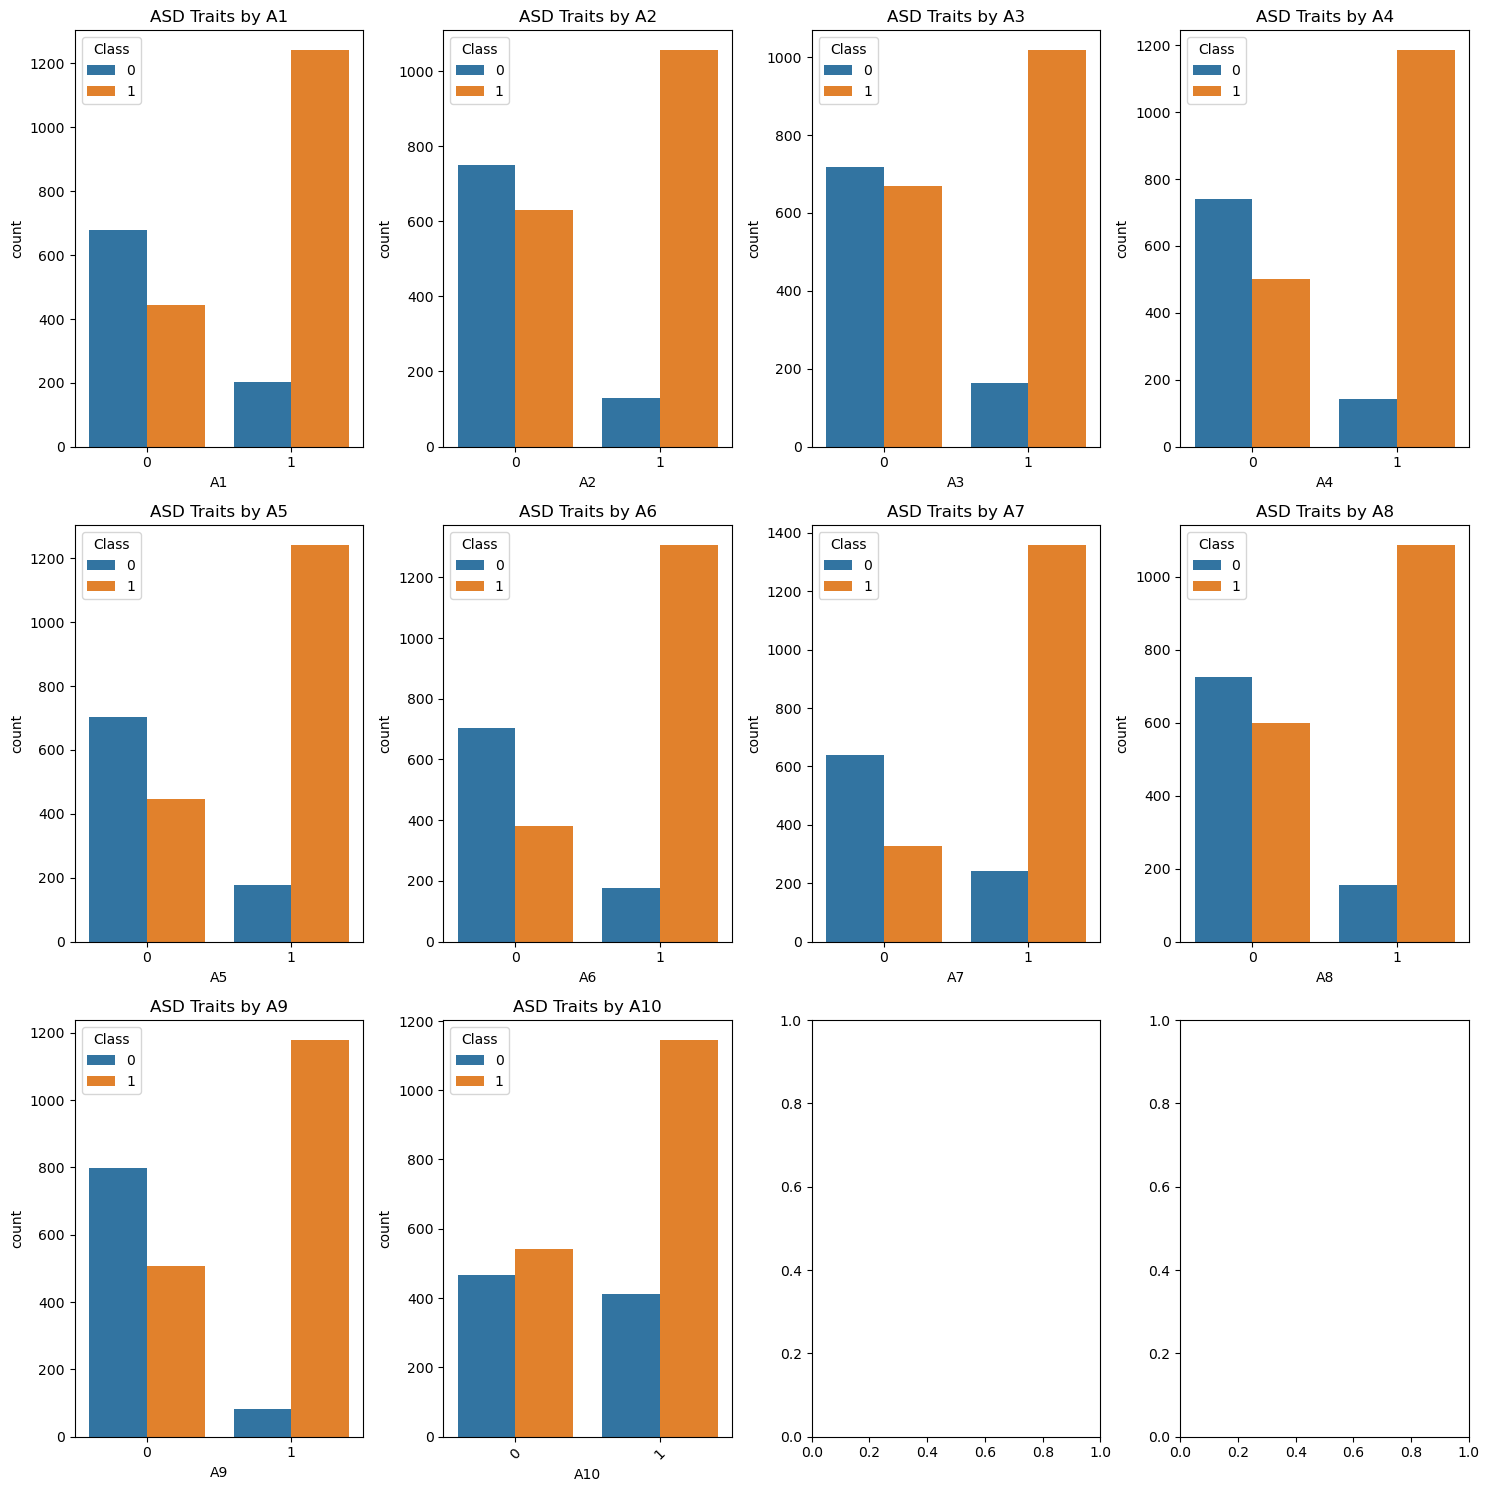

In [20]:
## Visualize the relationship between the categorical features and the target
# Set up grid of subplots
plt.subplots (3, 4, figsize = (15, 15))

# Initialize counter
plot_num = 1

numerical_df = df.loc[:, numerical_col]

for col in numerical_col: 
    plt.subplot(3, 4, plot_num)
    sns.countplot(data=df, x=col, hue='Class')
    plt.title(f'ASD Traits by {col}')
    
    plot_num +=1
    
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

**Insights**
- All the Questions being asked, if "Yes" usually points to ASD traits.
- A2, A3 and A8 which are questions relating to eye contact, focus, speech and motion do not show a strong relationship with ASD trait detection as 'No' answers from parents still have children being detected with ASD traits

### Multicollinearity Check

In [14]:
X = df.drop('Class', axis=1)
X.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,0,0,0,0,0,1,1,1,0,0
1,0,0,1,0,1,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [15]:
y = df['Class'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [16]:
# Correlation between independent variables
X_corr = X.corr()
X_corr

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
A1,1.000000,0.432914,0.269471,0.280319,0.276575,0.375244,0.302467,0.215639,0.326047,0.144211
A2,0.432914,1.000000,0.253457,0.291963,0.252493,0.334182,0.268693,0.272017,0.292596,0.168869
A3,0.269471,0.253457,1.000000,0.498677,0.361378,0.322092,0.211467,0.246947,0.373941,0.028708
A4,0.280319,0.291963,0.498677,1.000000,0.349346,0.370516,0.284370,0.274196,0.424134,0.015795
A5,0.276575,0.252493,0.361378,0.349346,1.000000,0.407900,0.326679,0.300625,0.403207,0.060400
A6,0.375244,0.334182,0.322092,0.370516,0.407900,1.000000,0.333590,0.304387,0.417947,0.104318
A7,0.302467,0.268693,0.211467,0.284370,0.326679,0.333590,1.000000,0.258563,0.358460,0.125367
A8,0.215639,0.272017,0.246947,0.274196,0.300625,0.304387,0.258563,1.000000,0.292680,0.102995
A9,0.326047,0.292596,0.373941,0.424134,0.403207,0.417947,0.358460,0.292680,1.000000,0.052618
A10,0.144211,0.168869,0.028708,0.015795,0.060400,0.104318,0.125367,0.102995,0.052618,1.000000


Heatmap


<AxesSubplot:>

<Figure size 640x480 with 0 Axes>

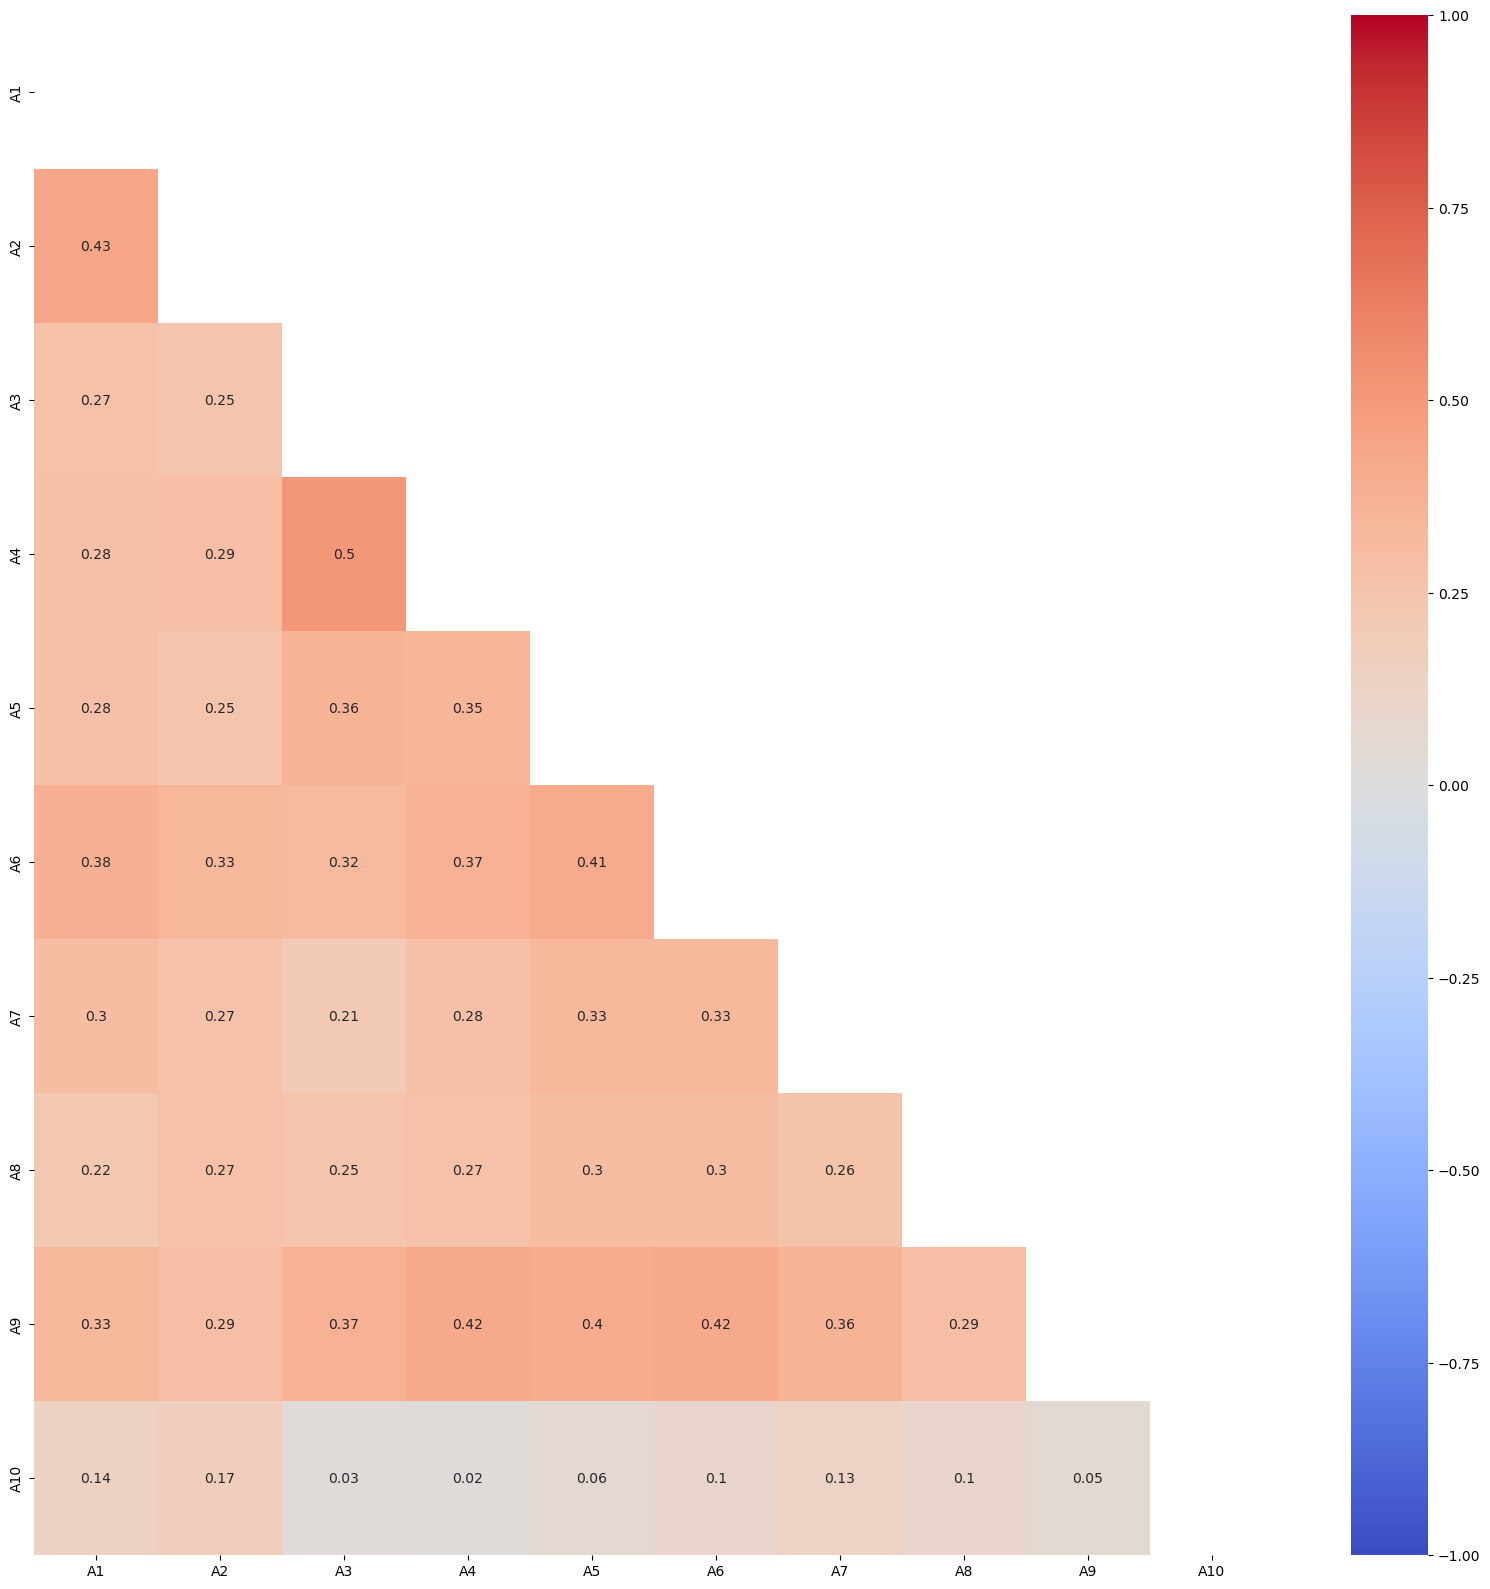

In [17]:
print('Heatmap')
plt.figure()

# mask
mask = np.triu(X_corr)

# heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(X_corr.round(2), vmax=1, vmin=-1, center=0, annot=True, mask=mask, cmap='coolwarm')

In [ ]:
# Creating a csv file for the cleaned data
autism_file_path = 'autism_clean.csv'
new_df.to_csv(autism_file_path, index=False)